In [1]:
import requests
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import highlight_text as htext
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.font_manager
from PIL import Image
from io import BytesIO

In [2]:
# add font family
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-light.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-black.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-roman.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Bebas_Neue/BebasNeue-Regular.ttf')

In [87]:
# get team to logo URL datframe
team_logoURL = pd.read_csv("./data/logos.csv")

In [133]:
team = 'KC'
season = 2022
week = 4
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','home_team','away_team','posteam','defteam','game_seconds_remaining','game_half','fixed_drive_result']#'qb_kneel','field_goal_attempt','TD_team','safety','penalty','fumble_lost','interception','fourth_down_failed']
df_pbp = nfl.import_pbp_data(years=[season], columns=cols, downcast=True, cache=False)
logoURL = team_logoURL[team_logoURL['team'] == team].team_logo.tolist()[0]

2022 done.
Downcasting floats.


In [134]:
conditional_team = (df_pbp['posteam'] == team)
conditional_week = (df_pbp['week'] == week)
is_down = (df_pbp['down'].notnull())
df_team_week_plays = df_pbp[conditional_team & conditional_week & is_down]
df_team_week_plays

,game_id,epa,season_type,week,drive,series,down,ydstogo,wp,ep,yardline_100,home_team,away_team,posteam,defteam,game_seconds_remaining,game_half,fixed_drive_result,season
9557,2022_04_KC_TB,0.152953,REG,4,2.0,2.0,1.0,10.0,0.544652,4.525636,21.0,TB,KC,KC,TB,3596.0,Half1,Touchdown,2022
9558,2022_04_KC_TB,2.321411,REG,4,2.0,2.0,2.0,5.0,0.612105,4.678589,16.0,TB,KC,KC,TB,3560.0,Half1,Touchdown,2022
9569,2022_04_KC_TB,0.909041,REG,4,4.0,6.0,1.0,10.0,0.642870,0.455481,79.0,TB,KC,KC,TB,3306.0,Half1,Touchdown,2022
9570,2022_04_KC_TB,-0.061788,REG,4,4.0,7.0,1.0,10.0,0.660409,1.364522,67.0,TB,KC,KC,TB,3270.0,Half1,Touchdown,2022
9571,2022_04_KC_TB,-0.081582,REG,4,4.0,7.0,2.0,6.0,0.664909,1.302734,63.0,TB,KC,KC,TB,3238.0,Half1,Touchdown,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,2022_04_KC_TB,-0.295299,REG,4,21.0,63.0,1.0,10.0,0.995347,1.322222,64.0,TB,KC,KC,TB,120.0,Half2,Punt,2022
9733,2022_04_KC_TB,-0.981832,REG,4,21.0,63.0,2.0,5.0,0.995261,1.026923,59.0,TB,KC,KC,TB,113.0,Half2,Punt,2022
9735,2022_04_KC_TB,-0.188140,REG,4,21.0,63.0,3.0,7.0,0.994470,0.045091,61.0,TB,KC,KC,TB,108.0,Half2,Punt,2022
9736,2022_04_KC_TB,0.033877,REG,4,21.0,63.0,3.0,17.0,0.993863,-0.143049,71.0,TB,KC,KC,TB,101.0,Half2,Punt,2022


In [135]:
home_team = df_team_week_plays.home_team.unique()[0]
away_team = df_team_week_plays.away_team.unique()[0]

In [136]:
srs_team_weeks_sums = df_team_week_plays.groupby(['drive']).agg({'epa':'sum','ep':'sum','posteam':'count'})
(srs_team_weeks_sums.ep/srs_team_weeks_sums.posteam).sum(axis=0)

27.164964654710555

In [137]:
df_drives_results_halfs = df_team_week_plays[['drive','fixed_drive_result','game_half']].drop_duplicates(['drive','fixed_drive_result'])
drives = df_drives_results_halfs['drive'].tolist()
results = df_drives_results_halfs['fixed_drive_result'].tolist()
game_halfs = df_drives_results_halfs['game_half'].tolist()
half_idx = game_halfs.index('Half2')
game_halfs.insert(half_idx, 'Halftime')
drives.insert(half_idx, -1)
results.insert(half_idx, '')

height_ratios=[1]*(len(drives)-1)
height_ratios.insert(half_idx,0.1)

league_epa_min =df_pbp.epa.min()
league_epa_max =df_pbp.epa.max()
game_epa_min =df_team_week_plays.epa.min()
game_epa_max =df_team_week_plays.epa.max()

In [138]:
height_ratios

[1, 1, 1, 1, 1, 1, 0.1, 1, 1, 1, 1, 1]

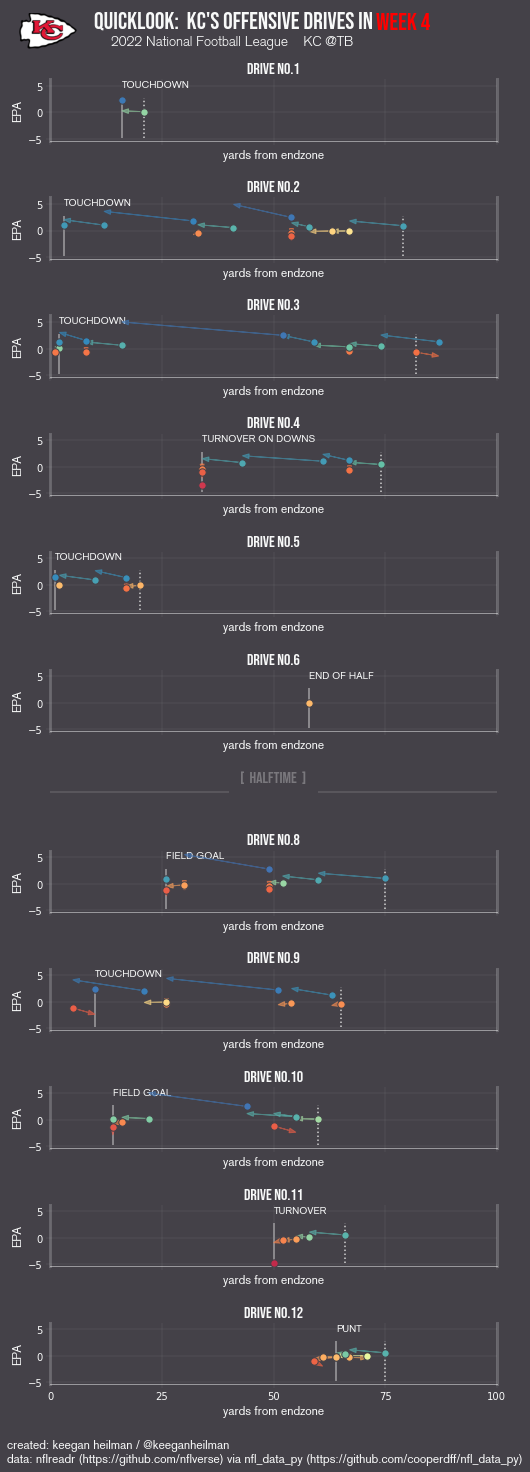

In [140]:
# adjust coloring of downs?
# How do I want to convey personnel, down and distance, results of drive?
# Can 

font1 = "AkzidenzGrotesk"
font2 =  "Bebas Neue"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
drive_start_color = "lightgrey"
# drive_end_color = {"":""}
drive_end_color = "white"
color_map = "Spectral"
first_down = "#CFF3F2"
second_down = "#B2D0CF"
third_down = "#8EA6A5"
fourth_down = "#549694"

title = "Quicklook:  {}'s Offensive Drives in <Week {}>\n"
drive_title = "drive no.{}"
subtitle = "{} National Football League    {} @{}"
credits = "created: keegan heilman / @keeganheilman\ndata: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

fig = plt.figure(figsize=(8,24))
gs = fig.add_gridspec(len(drives), hspace=1, height_ratios=height_ratios)
axs = gs.subplots(sharex=True, sharey=True)
fig.set_facecolor(background)

cmap = matplotlib.cm.get_cmap(color_map)
norm = mpl.colors.SymLogNorm(linthresh=0.1, vmin=league_epa_min, vmax=league_epa_max)

for drive_idx, (drive, drive_result, game_half) in enumerate(zip(drives, results, game_halfs)):
    if game_half == 'Halftime':
        axs[drive_idx].patch.set_facecolor(background)
        axs[drive_idx].set_title(label='[  halftime  ]', color=text_color, fontweight="light", fontfamily=font2, fontsize=16, alpha=0.3)
        axs[drive_idx].axis("off")
        axs[drive_idx].hlines(y=[-1], xmin=0, xmax=40, colors=[drive_start_color],linestyles="solid", alpha=0.2)
        axs[drive_idx].hlines(y=[-1], xmin=60, xmax=100, colors=[drive_start_color],linestyles="solid", alpha=0.2)
    else:
        x = df_team_week_plays[df_team_week_plays.drive == drive].yardline_100.tolist()
        y = df_team_week_plays[df_team_week_plays.drive == drive].epa.tolist()
        axs[drive_idx].patch.set_facecolor(background)
        axs[drive_idx].grid(ls="-", lw=0.2, color="#838383", zorder=-10)
        axs[drive_idx].set_title(drive_title.format(drive_idx+1), color=text_color, fontweight="light", fontfamily=font2, fontsize=16)
        axs[drive_idx].set_xlim(0,100)
        axs[drive_idx].set_xlabel("yards from endzone",color=text_color,fontfamily=font1, fontsize=12)
        axs[drive_idx].set_ylabel("EPA",color=text_color,fontfamily=font1, fontsize=12)
        axs[drive_idx].tick_params(axis="both",length=4, width=0.2, color="#838383")
        axs[drive_idx].xaxis.set_major_locator(plt.MaxNLocator(4))
      
        spines = ["top", "right", "bottom", "left"]
        for s in spines:
            if s in ["top"]:
                axs[drive_idx].spines[s].set_visible(False)
            elif s in ["left", "right"]:
                axs[drive_idx].spines[s].set_color(text_color)
                axs[drive_idx].spines[s].set_linewidth(3)
                axs[drive_idx].spines[s].set_alpha(.2)
            else:
                axs[drive_idx].spines[s].set_color(text_color)
                axs[drive_idx].spines[s].set_alpha(.6)



        for point_idx, (x_val, y_val) in enumerate(zip(x,y)):
            if point_idx < len(x)-1:
                if point_idx == 0:
                    axs[drive_idx].vlines(x_val, ymin=game_epa_min, ymax=game_epa_max, colors=[drive_start_color],linestyles="dotted")
                axs[drive_idx].arrow(x_val,y_val,
                                     x[point_idx+1]-x_val,y_val,
                                     color=(cmap(norm(y[point_idx]))),
                                     shape="full",
                                     length_includes_head=True,
                                     head_width=0.9,
                                     head_length=1.5,
                                     capstyle="butt",
                                     alpha=0.6,
                                     lw=1,
                                     zorder=5)
            # might assign color to yards to go? or EP?
            if point_idx == len(x)-1:
                axs[drive_idx].vlines(x_val, ymin=game_epa_min, ymax=game_epa_max, colors=[drive_end_color],linestyles="solid", zorder=-5,alpha=0.5)
                axs[drive_idx].text(x=x_val,y=game_epa_max+2, s=drive_result.upper(), color=text_color, fontfamily=font1, fontsize=10)
            axs[drive_idx].scatter(x_val,y_val, color=(cmap(norm(y_val))),edgecolors=background,s=55, alpha=1,lw=1,zorder=10)

        
        
htext.fig_text(s=title.format(team, week),x=0.2, y=0.92, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=24, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle.format(season,away_team,home_team), fontweight="light", color=text_color,fontfamily=font1, fontsize=14)

# fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[0], ticks=[10,1,0.1,0,-0.1,-1,-10])

# add logo
ax2 = fig.add_axes([0.07,0.858,0.10,0.10])
ax2.axis("off")
url = logoURL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             

fig.text(0.05, 0.08,credits, fontstyle="italic", fontweight="roman",fontsize=12, fontfamily=font1, color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')

In [30]:



# confirm font family is added
# from IPython.core.display import HTML
# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [66]:
df_team_week_plays[((df_team_week_plays['down'] == 1) | (df_team_week_plays['down'] == 2))].epa
df_team_week_plays[((df_team_week_plays['down'] == 3) | (df_team_week_plays['down'] == 4))].epa

9561   -0.234484
9562    2.009459
9563    0.552300
9564   -1.220886
9565    0.821761
9584   -1.164958
9585   -0.853537
9604    0.712392
9605    1.521636
9606    0.757183
9607   -0.373587
9608    0.892704
9609    2.049282
9620   -5.820731
9630    0.204874
9632   -0.388793
9634   -0.288332
9635    0.222565
9638    0.485832
9640   -0.184415
9641   -0.211533
9644    2.278424
9645   -0.589850
9646    2.327518
9663   -0.588134
9664    1.159994
9665   -0.549108
9666   -0.807620
9680    0.396764
9681    0.369835
9682    0.844604
9683    0.125377
9684   -0.373595
9686    0.836690
9687    1.210694
9688    0.296169
9689   -0.107155
9690   -0.386179
9706    0.120748
9707    0.901739
9708   -0.538718
9709   -0.430656
9719    0.828518
9720   -0.413031
9721    0.767708
9723    1.314559
9739    0.084583
9740   -0.133540
9741    0.684956
9742   -0.107420
9743   -0.767161
Name: epa, dtype: float32

<AxesSubplot:>

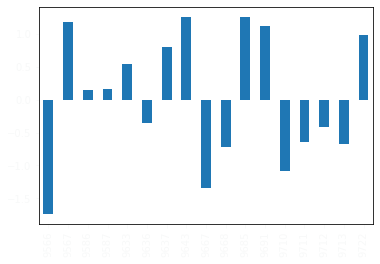